# Healthcare Lab (GroupBy Operations)

**Learning Objectives:**
  * Practice the application of groupby operations in data science contexts
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [4]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [5]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

## 3. Cost Analysis
### We need to conduct a basic analysis of medical costs.

### 3.1. Cost analysis per Type of Medical Event (TypeFlag Category)

In [6]:
HealthCareDataSet.groupby('TypeFlag').agg({'TotalExpenses':'sum'})

,TotalExpenses
TypeFlag,
ER,2.215367e+07
INP,1.216182e+08


### 3.2. Cost analysis per County

In [7]:
TotalCostsPerCounty=HealthCareDataSet.groupby('County').agg({'TotalExpenses':'sum'})
TotalCostsPerCounty.rename(columns={'TotalExpenses': 'SumTotalExpenses'},inplace=True)
TotalCostsPerCounty.sort_values(by='SumTotalExpenses',ascending=False,inplace=True)
TotalCostsPerCounty

,SumTotalExpenses
County,
02af982d,6.965805e+07
425a37b2,2.389492e+07
fd218584,1.641345e+07
89e38653,8.851130e+06
b021dd12,6.025211e+06
6f943458,5.933939e+06
e6708950,4.236988e+06
7d9b432e,2.309971e+06
ea48569b,1.617326e+06


<Axes: xlabel='County'>

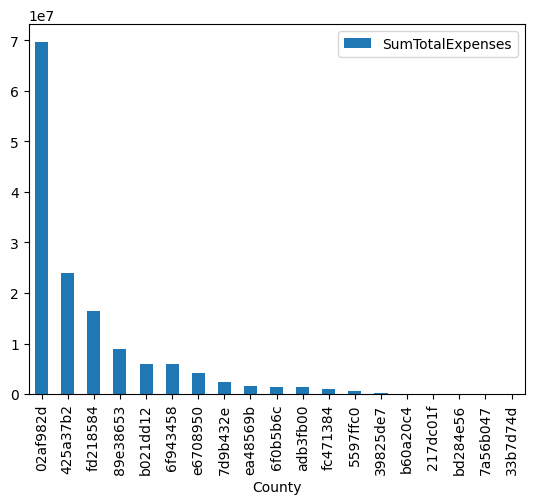

In [8]:
TotalCostsPerCounty.reset_index().plot.bar(x='County', y='SumTotalExpenses', rot=90)

### 3.3. Cost analysis per County and Principal Diagnosis


In [9]:
## We compute the sum of expenses per county and PrincipalDiagnosisDescr. This requires a groupby-aggregation operation

TotalCostsPerCountyPrincipalDiagnosis=HealthCareDataSet.groupby(['County','PrincipalDiagnosisDesc']).agg({'TotalExpenses':'sum'})
TotalCostsPerCountyPrincipalDiagnosis.rename(columns={'TotalExpenses': 'SumTotalExpenses'},inplace=True)

TotalCostsPerCountyPrincipalDiagnosis.reset_index(inplace=True)
TotalCostsPerCountyPrincipalDiagnosis

,County,PrincipalDiagnosisDesc,SumTotalExpenses
0,02af982d,Abdominal aortic aneurysm,271173.357
1,02af982d,Abdominal distension (gas,30878.827
2,02af982d,Abnormal finding of blood,4739.028
3,02af982d,Abrasion of left elbow in,636.321
4,02af982d,Abrasion of left little f,2226.518
...,...,...,...
1611,fd218584,Upper abdominal pain unsp,28438.886
1612,fd218584,Urinary tract infection s,109676.420
1613,fd218584,Vascular disorder of inte,94991.323
1614,fd218584,Ventricular tachycardia,144690.707


#### Top 3 Medical Procedures per County

In [10]:
## Let's extract the top 3 most expensive medical procedures per county. This requires a groupby-filtration operation
Top3PrincipalDiagnosisPerCounty=TotalCostsPerCountyPrincipalDiagnosis.groupby('County').head(3)
Top3PrincipalDiagnosisPerCounty

,County,PrincipalDiagnosisDesc,SumTotalExpenses
0,02af982d,Abdominal aortic aneurysm,271173.357
1,02af982d,Abdominal distension (gas,30878.827
2,02af982d,Abnormal finding of blood,4739.028
522,217dc01f,Encounter for issue of re,1682.660
523,217dc01f,Foreign body in right ear,1530.900
524,217dc01f,Low back pain,156.100
530,33b7d74d,Dermatitis unspecified,1733.242
531,39825de7,Acute pharyngitis unspeci,1092.000
532,39825de7,Atherosclerotic heart dis,37675.694
533,39825de7,COVID-19,52131.702


### 3.4. Cost analysis per Hospital

In [11]:
TotalCostsPerHospital=HealthCareDataSet.groupby('HospitalName').agg({'TotalExpenses':'sum'})
TotalCostsPerHospital.rename(columns={'TotalExpenses': 'SumTotalExpenses'},inplace=True)
TotalCostsPerHospital.sort_values(by='SumTotalExpenses',ascending=False,inplace=True)
TotalCostsPerHospital

,SumTotalExpenses
HospitalName,
ae46acbf,3.560780e+07
446442f4,2.151007e+07
a9bf1474,1.230149e+07
4d103af0,1.000380e+07
2f45157f,8.243037e+06
...,...
17b02468,5.502000e+02
fd89f646,4.663400e+02
1b158493,3.881850e+02


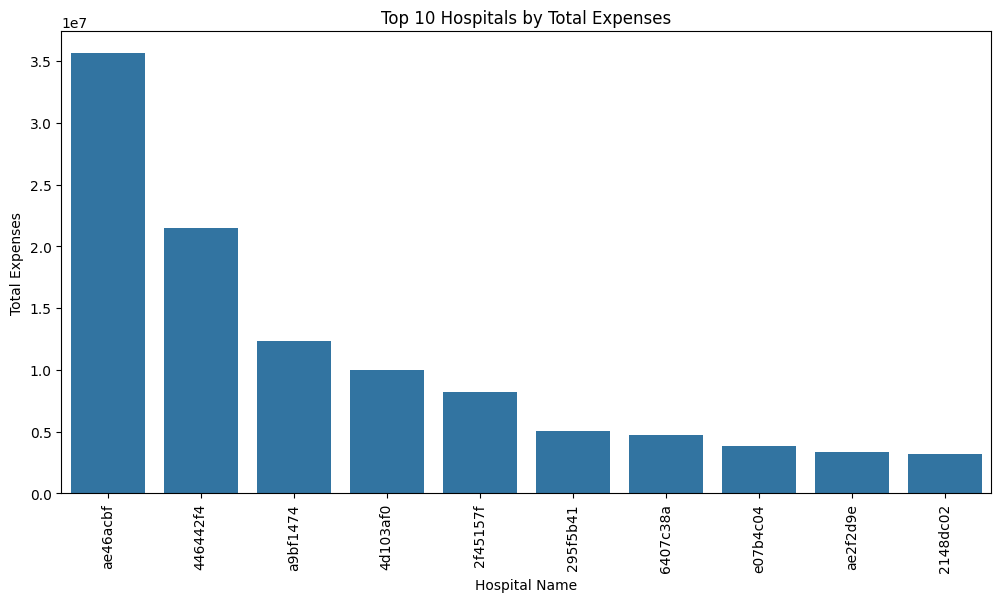

In [12]:
# prompt: plot totalcostsperhospital top 10 use seaborn

top_10_hospitals = TotalCostsPerHospital.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_hospitals.index, y=top_10_hospitals['SumTotalExpenses'])
plt.xlabel('Hospital Name')
plt.ylabel('Total Expenses')
plt.title('Top 10 Hospitals by Total Expenses')
plt.xticks(rotation=90)
plt.show()


### 3.5. Cost analysis per Patient and County

In [13]:
TotalCostsPerCountyMember=HealthCareDataSet.groupby(['County','MemberID']).agg({'TotalExpenses':'sum'})
TotalCostsPerCountyMember.rename(columns={'TotalExpenses': 'SumTotalExpenses'},inplace=True)
TotalCostsPerCountyMember.sort_values(by='SumTotalExpenses',ascending=False,inplace=True)
TotalCostsPerCountyMember

SumTotalExpenses
County   MemberID                  
425a37b2 6300cdae       2075233.916
02af982d 2bf42892       1156360.877
425a37b2 c1fb6713       1107621.039
02af982d e8b6b438       1033237.527
6f943458 54dabc09       1026046.063
...                             ...
02af982d 9e636133           550.200
425a37b2 c45c8ba3           492.100
         cd725d86           433.300
02af982d 26438e33           388.185
89e38653 2f83e2ef           280.700

[1763 rows x 1 columns]

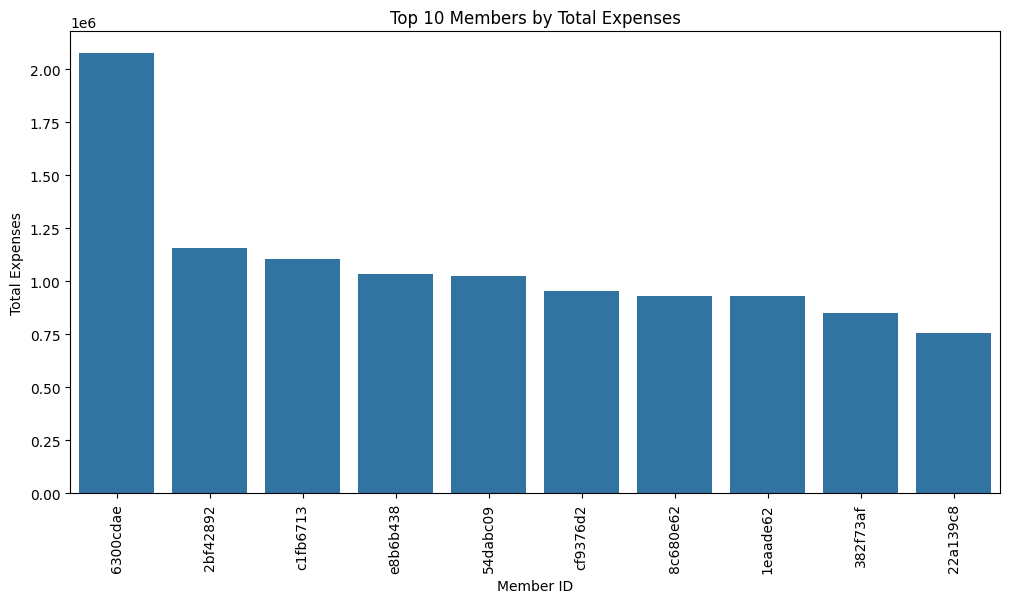

In [14]:
## We might be interested in observing the top 10 most expensive members accross all counties
top_10_members = TotalCostsPerCountyMember.reset_index().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_members['MemberID'], y=top_10_members['SumTotalExpenses'])
plt.xlabel('Member ID')
plt.ylabel('Total Expenses')
plt.title('Top 10 Members by Total Expenses')
plt.xticks(rotation=90)
plt.show()

In [15]:
TotalCostsPerCountyMember

SumTotalExpenses
County   MemberID                  
425a37b2 6300cdae       2075233.916
02af982d 2bf42892       1156360.877
425a37b2 c1fb6713       1107621.039
02af982d e8b6b438       1033237.527
6f943458 54dabc09       1026046.063
...                             ...
02af982d 9e636133           550.200
425a37b2 c45c8ba3           492.100
         cd725d86           433.300
02af982d 26438e33           388.185
89e38653 2f83e2ef           280.700

[1763 rows x 1 columns]

In [16]:
## Alternatively we might prefer to rank members based on their position in each county.
### This requires a groupby-transformation operation

TotalCostsPerCountyMember['CountyCostRank']=TotalCostsPerCountyMember.groupby('County').rank(ascending=False)


In [17]:
TotalCostsPerCountyMember.reset_index(inplace=True)
TotalCostsPerCountyMember

,County,MemberID,SumTotalExpenses,CountyCostRank
0,425a37b2,6300cdae,2075233.916,1.0
1,02af982d,2bf42892,1156360.877,1.0
2,425a37b2,c1fb6713,1107621.039,2.0
3,02af982d,e8b6b438,1033237.527,2.0
4,6f943458,54dabc09,1026046.063,1.0
...,...,...,...,...
1758,02af982d,9e636133,550.200,813.0
1759,425a37b2,c45c8ba3,492.100,291.0
1760,425a37b2,cd725d86,433.300,292.0
1761,02af982d,26438e33,388.185,814.0


In [18]:
## We can filter based on rank value to extract top spenders per county

TotalCostsPerCountyMember[TotalCostsPerCountyMember['CountyCostRank']<=3]


,County,MemberID,SumTotalExpenses,CountyCostRank
0,425a37b2,6300cdae,2075233.916,1.0
1,02af982d,2bf42892,1156360.877,1.0
2,425a37b2,c1fb6713,1107621.039,2.0
3,02af982d,e8b6b438,1033237.527,2.0
4,6f943458,54dabc09,1026046.063,1.0
5,02af982d,cf9376d2,953431.976,3.0
6,fd218584,8c680e62,932944.502,1.0
9,89e38653,22a139c8,756946.624,1.0
10,e6708950,c1a327ff,716056.215,1.0
11,fd218584,5ef26c65,663574.317,2.0


## 4. Detailed Analysis of Top Medical Diagnosis
### We need to conduct a detailed analysis of the top 3 Medical Diagnosis

In [19]:
# We list the top 3 Medical Diagnosis by TotalExpenses
TotalCostPerPrincipalDiagnosis=HealthCareDataSet.groupby('PrincipalDiagnosisDesc').agg({'TotalExpenses':'sum'})
TotalCostPerPrincipalDiagnosis.rename(columns={'TotalExpenses': 'SumTotalExpenses'},inplace=True)
TotalCostPerPrincipalDiagnosis.sort_values(by='SumTotalExpenses',ascending=False,inplace=True)
TotalCostPerPrincipalDiagnosis


,SumTotalExpenses
PrincipalDiagnosisDesc,
Sepsis unspecified organi,1.013163e+07
Non-ST elevation (NSTEMI),6.036035e+06
Atherosclerotic heart dis,5.258583e+06
Hypertensive heart and ch,3.996002e+06
Type 2 diabetes mellitus,3.492961e+06
...,...
Impacted cerumen left ear,5.334000e+02
Hyphema right eye,5.264000e+02
Bullous keratopathy left,4.921000e+02


In [20]:
top3PrincipalDiagnosisList=TotalCostPerPrincipalDiagnosis.head(3).index
top3PrincipalDiagnosisList

Index(['Sepsis unspecified organi', 'Non-ST elevation (NSTEMI)',
       'Atherosclerotic heart dis'],
      dtype='object', name='PrincipalDiagnosisDesc')

In [21]:
Top3PrincipalDiagnosisFilter=HealthCareDataSet['PrincipalDiagnosisDesc'].isin(top3PrincipalDiagnosisList)

In [22]:
HealthCareDataSet[Top3PrincipalDiagnosisFilter]

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
360,634939,038d3716,e5873427,fd218584,c2e50b9b25e4212a,12,446442f4,HOSPITAL,2020-01-07,2020-01-11,Sepsis unspecified organi,A41.9,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,INP,1945-11-04,1908.263
361,634940,038d3716,e5873427,fd218584,c2e50b9b25e4212a,4,446442f4,HOSPITAL,2020-01-07,2020-01-11,Sepsis unspecified organi,A41.9,MEDICAL/SURGICAL SUPPLIES: STERILE SUPPLIES,272.0,INP,1945-11-04,772.443
373,634952,038d3716,e5873427,fd218584,c2e50b9b25e4212a,8,446442f4,HOSPITAL,2020-01-07,2020-01-11,Sepsis unspecified organi,A41.9,LABORATORY - CLINICAL DIAGNOSTIC: UROLOGY,307.0,INP,1945-11-04,392.000
374,634953,038d3716,e5873427,fd218584,c2e50b9b25e4212a,1,446442f4,HOSPITAL,2020-01-07,2020-01-11,Sepsis unspecified organi,A41.9,MEDICAL/SURGICAL/GYN,121.0,INP,1945-11-04,9412.725
375,634954,038d3716,e5873427,fd218584,c2e50b9b25e4212a,10,446442f4,HOSPITAL,2020-01-07,2020-01-11,Sepsis unspecified organi,A41.9,OTHER IMAGING SERVICES: ULTRASOUND,402.0,INP,1945-11-04,4421.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52462,741442,bbc135c5,8a67b784,02af982d,286c9868a16fb47c,19,446442f4,HOSPITAL,2020-12-20,2020-12-21,Atherosclerotic heart dis,I25.119,LABORATORY - CLINICAL DIAGNOSTIC: CHEMISTRY,301.0,ER,1961-12-08,245.889
52463,741443,bbc135c5,8a67b784,02af982d,286c9868a16fb47c,23,446442f4,HOSPITAL,2020-12-20,2020-12-21,Atherosclerotic heart dis,I25.119,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1961-12-08,314.118
52464,741444,bbc135c5,8a67b784,02af982d,286c9868a16fb47c,24,446442f4,HOSPITAL,2020-12-20,2020-12-21,Atherosclerotic heart dis,I25.119,LABORATORY - CLINICAL DIAGNOSTIC: BACTERIOLOGY...,306.0,ER,1961-12-08,37.268
52465,741445,bbc135c5,8a67b784,02af982d,286c9868a16fb47c,25,446442f4,HOSPITAL,2020-12-20,2020-12-21,Atherosclerotic heart dis,I25.119,RADIOLOGY - DIAGNOSTIC: CHEST X-RAY,324.0,ER,1961-12-08,971.075


### 4.1. Detailed Cost Analysis per County

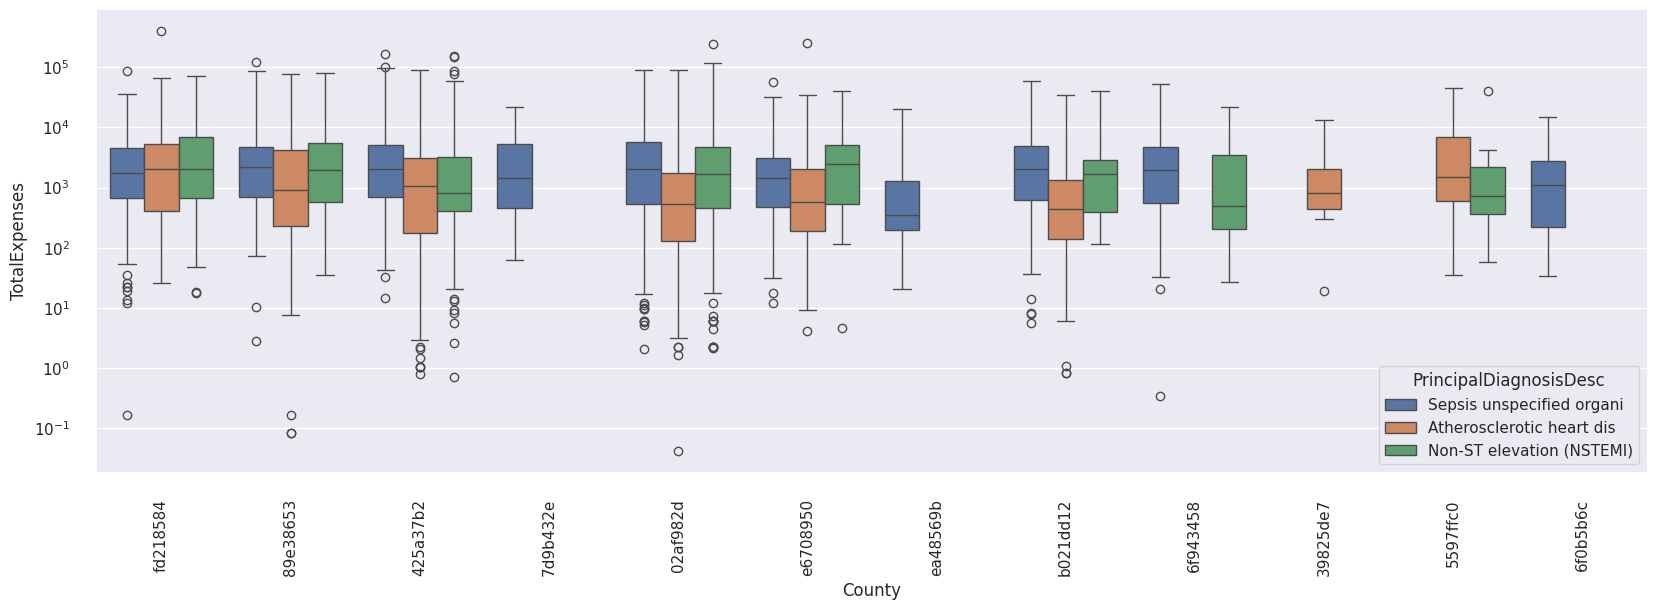

In [23]:
sns.set(rc={'figure.figsize':(20, 6)})  # width=10, height=6
ax=sns.boxplot(x="County", y="TotalExpenses",data=HealthCareDataSet[Top3PrincipalDiagnosisFilter],log_scale=(False, True),hue='PrincipalDiagnosisDesc')
ax.tick_params(axis='x', rotation=90)

sns.despine(offset=10, trim=True)